In [118]:
import numpy as np
from scipy.fftpack import dct
from scipy.fftpack import idct

In [119]:
import PIL
from PIL import Image

In [120]:
!mv ~/Desktop/test_image.bmp .

mv: /Users/sidharthshanker/Desktop/test_image.bmp: No such file or directory


In [121]:

image_bitmap = np.asarray(i)

In [122]:
def dct_encode(matrix):
    intermediate = dct(matrix, type=2, norm="ortho", axis=0)
    final = dct(intermediate, type=2, norm="ortho", axis=1)
    return final
    #return final
    
def dct_decode(matrix):
    intermediate = idct(matrix, type=2, norm="ortho", axis=0)
    final = idct(intermediate, type=2, norm="ortho", axis=1)
    return final

In [123]:
dct_image = dct_encode(np.array(a))

In [124]:
dct_image[0:2, 0:2]

array([[17056.72265625,   862.61857565],
       [-2142.87851461, -1027.95272932]])

In [125]:
def compress_dct(matrix, new_size):
    return matrix[0:new_size, 0:new_size]

In [126]:
compress_dct(dct_image, 2)

array([[17056.72265625,   862.61857565],
       [-2142.87851461, -1027.95272932]])

In [154]:
def pad_dct(matrix, new_size):
    temp = np.zeros((new_size, new_size))
    rows, cols = matrix.shape
    temp[0:rows, 0:cols] = matrix
    return temp
    

In [175]:
compressed_image = dct_decode(pad_dct(compress_dct(dct_encode(image_bitmap), 30), 256))

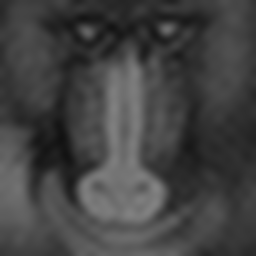

In [176]:
Image.fromarray(np.rint(compressed_image).astype('uint8'), mode="P")

In [157]:
image_bitmap

array([[58, 25, 56, ..., 45, 70, 68],
       [47, 28, 48, ..., 64, 50, 41],
       [53, 79, 36, ..., 55, 34, 30],
       ...,
       [46, 55, 65, ..., 44, 37, 45],
       [46, 64, 58, ..., 44, 41, 51],
       [61, 58, 48, ..., 41, 39, 47]], dtype=uint8)

In [159]:
#compressed_image.astype(int, casting="equiv")
np.rint(compressed_image).astype('uint8')

array([[58, 25, 56, ..., 45, 70, 68],
       [47, 28, 48, ..., 64, 50, 41],
       [53, 79, 36, ..., 55, 34, 30],
       ...,
       [46, 55, 65, ..., 44, 37, 45],
       [46, 64, 58, ..., 44, 41, 51],
       [61, 58, 48, ..., 41, 39, 47]], dtype=uint8)

In [177]:
compressed_image = compress_dct(dct_encode(image_bitmap), 30)

In [184]:
import struct

def write_compressed_dct_to_byte_string(compressed_image):
    dim = compressed_image.shape[0]
    vals = [struct.pack("f", item) for item in compressed_image.flatten()]
    
    return struct.pack("H", dim) + "".join(vals)
    
byte_s = write_compressed_dct_to_byte_string(compressed_image)


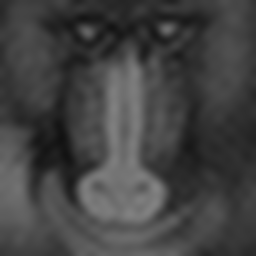

In [219]:

def read_compressed_dct_from_byte_string(byte_string):
    size = struct.unpack('h', byte_string[0:2])[0]
    image_vals = []

    byte_vals = byte_string[2:]
    for i in xrange(0, len(byte_vals), 4):
        image_vals.append(struct.unpack('f', byte_vals[i:i+4])[0])
    return np.reshape(np.array(image_vals), newshape=(size,size))

Image.fromarray(np.rint(dct_decode(pad_dct(read_compressed_dct_from_byte_string(byte_s), 256))).astype('uint8'), mode="P")


In [216]:
compressed_image


array([[ 1.70567227e+04,  8.62618576e+02, -2.06350891e+03,
         2.90045428e+02,  2.65861190e+03,  6.68217984e+02,
        -7.20756807e+02,  1.62582028e+02, -4.40080108e+02,
         2.19398643e+01, -1.67980118e+02, -3.49468505e+01,
         2.46433180e+02, -1.50067121e+02, -3.16903837e+02,
        -1.48163021e+02, -2.17795826e+02, -6.14626926e+01,
         8.92474939e+01,  3.01337156e+02, -3.70300641e+01,
        -2.13696459e+02,  1.16858057e+02,  2.53530882e+02,
        -5.47626867e+01, -1.49046130e+02,  2.05907891e+01,
         6.25333922e+01, -5.58514321e+01, -3.99227499e+01],
       [-2.14287851e+03, -1.02795273e+03,  1.64724040e+03,
        -2.08693001e+02, -6.24323103e+02, -4.45879242e+02,
        -3.18750243e+02, -2.17915498e+02, -3.09507412e+02,
         2.14008407e+02, -4.72155263e+02,  5.38849461e+01,
         1.16044339e+02,  1.10119456e+02,  1.45161365e+01,
         2.56938192e+02,  7.38269215e+01, -7.46129648e+01,
        -3.59285978e+01, -2.33384271e+01, -1.39751419e+